# ELEN0016 - Computer Vision 
## Project Part. 2 - Ellipse matching and performance assessment 
Antoine Rousseau, François Blistein, Renaud Vandeghen, Alexandre Lhoest (group 7)

##  Description of the work

The aim of the project is to develop modules to detect/match ellipses in images and to assess the performances of this modules. The image database is composed of two different types of images : 

  -  Annotated line images (sudoku, soccer and road)
  -  Annotated ellipse images :  soccer field images where one will have to extract the white circles of the field marking (one central and two side half-circles) and eye infra-red images where one will have to find the pupil. 

The global work is subdivided into four tasks : 

  -  Task 2.1 : performance assessment of line segment detection. The task is to assess the performances of the line detection modules developed during the first part of the project. To do so, one will describe the metrics used and present the obtained results on these annotated images.
  -  Task 2.2 : ellipse matching. The main objective is to detect and local elliptical structures in images using Machine Learning. Practically, two programs have to be developed : 
     - For the pupil of the eyes images, the output must be the regression parameters of the detected ellipse ;
     - For the soccer images, the output must be the bounding box of the (1,2 or 3) detected ellipses. 
  -  Task 2.4 : performance assessment of the ellipse matching module. The goal is to assess the performances of the ellipse detection and matching module. To do so, one will describe the metrics used and present the obtained results on these annotated images. Practically, there are three quantitative assessments to measure quality of : 
     - [Classification Task] The detection of ellipses in input images ;
     - [Regression task on bounding boxes] The obtained position of the bounding boxes of the circles of the field marking in soccer images ;
     - [Regression task on ellipse parameters] The obtained parameters of the ellipes for the pupils in eye images. 


## Task 2.1 : performance assessment of line segment detection

During the first part of the project, the goal was to find efficient ways to extract and detect lines in five types of images : Building, PCB, Soccer, Road and Sudoku. For this purpose, some preprocessing methods were applied to the images (GaussianBlur...), then one applied edges detection method such as Canny or AdaptiveThreshold and, finally, one could increase the quality of the detections using postprocessing methods as dilation. By the end of this first part of the projet, one was able to classify edge pixels as being part of a line or not. This will be the basis of the performance assessment. 

Indeed, one wants to assess the performance of line segment detection developed before. To do so, a database of annotated lines images (sudoku, soccer and road) are provided. One will evaluate the performance as follows : 
  -  Based on confusion matrix definition, one will compare the line segment detection module with the annotations. For the edge pixels assumed to be part of a line segment, one will check if they belong actually to an annotated lines. If so, it will count for a true positive pixel. If not, it will count for a false positive pixels. In the same idea, a true negative pixel is a non-edge pixel that is actually annotated as being a non-edge pixel. Conversly, a false negative pixel is a non-edge pixel that is annotated to belong to a line. In order to have relative results, those number of true/false positive/negative pixels will be divided by the total number of classified edge pixels computed during the first part of the project. 
  -  Another qualitative way to assess the performance of line segment detection is to compare the detected lines at the Hough Line Transform output and the annotated lines. The goal will be to count the number of Hough lines that correspond to true lines. In order to do so, one will compare the number of pixels that belong to both a Hough Line and annotated lines. Thanks to this, it will be chosen if it actually represents the same line (with a tolerance parameter called alpha, tuned by hand for each different image types). This assessment method is less precised than the first one, but it gives a complementary evaluation. 

In order to get consistent results, the two methods are applied to the full image datasets for the three types of images. The edge detection methods developped during the first part of the project are assumed to be good if they give high percentage of true positive pixels and true negative pixels. The results are given below. It is not surprising to see that the sudoku images have the best results. It was actually the easiest type of images to process. For soccer and road images, the percentage of true positive pixels is lower. This is not so surprising. Indeed, during the first part of the project, one decided mainly to reject all the false lines that were detected by the method. This makes that lots of the true lines were also rejected. Therefore, if one looks at the percentage of true negative pixels, the percentages are way better in the case of soccer and road images. 

Finally, it will appear interesting to look at the impact of the dilation postprocessing on the performance assessment. This means, what happens if one dilates the detected edges by a factor 2, 3, 4,... In order to visualize it, one will generate the ROC curve associated to this. In a sense, it the dilation is performed with a factor 0, this means that the program will detect no true positive pixels and no false positive (0,0). If the dilation is performed with a factor really huge, the dilation will make the program will never detect any true negative or false negative pixels (1,1). The resulting plots are given below. 

In [1]:
%matplotlib inline

In [2]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map             
import pandas as pd
import sys
import os
from keras.models import load_model
from PIL import Image
import keras
import random

from Codes_report.tools import multiPlot         # A few helpers to plot multiple images
from Codes_report.sudoku_lines import sudoku_lines_eval, roc_curve_sudoku
from Codes_report.road_lines import road_lines_eval, roc_curve_road
from Codes_report.soccer_lines import soccer_lines_eval, roc_curve_soccer
from Codes_report.IOU_soccer import IOU_soccer
from Codes_report.getElpsParam import getElpsParameters

Using TensorFlow backend.


### Sudoku images 

In [ ]:
dilation_parameter = 1

true_pos, false_pos, true_neg, false_neg, lines_detected = sudoku_lines_eval(dilation_parameter)
print("Pourcent of true positive pixels = ", true_pos, "%")
print("Pourcent of false negative pixels = ", false_neg, "%")

print("Pourcent of true negative pixels = ", true_neg, "%")
print("Pourcent of false positive pixels = ", false_pos, "%")

print(lines_detected,"% of the Hough lines are real lines")

### Soccer images 

In [ ]:
dilation_parameter = 1

true_pos, false_pos, true_neg, false_neg, lines_detected = soccer_lines_eval(dilation_parameter)
print("Pourcent of true positive pixels = ", true_pos, "%")
print("Pourcent of false negative pixels = ", false_neg, "%")

print("Pourcent of true negative pixels = ", true_neg, "%")
print("Pourcent of false positive pixels = ", false_pos, "%")

print(lines_detected,"% of the Hough lines are real lines")

### Road images

In [ ]:
dilation_parameter = 1

true_pos, false_pos, true_neg, false_neg, lines_detected = road_lines_eval(dilation_parameter)
print("Pourcent of true positive pixels = ", true_pos, "%")
print("Pourcent of false negative pixels = ", false_neg, "%")

print("Pourcent of true negative pixels = ", true_neg, "%")
print("Pourcent of false positive pixels = ", false_pos, "%")

print(lines_detected,"% of the Hough lines are real lines")

### ROC curves 


The ROC curve in the case of the Sudoku and Soccer images show that a dilation does increase the true and false positive rates (dilation parameter going from 1 to 5). The first peak of the curve corresponds to a dilation of 1, then the two rates tend to increase. However, the false positive rate increases much faster than the true postive rate, which makes that it is better, in this case, to keep the dilation parameter equal to 1. This is sensible. In fact, increasing the width of the lines increase both the rate of the true positive pixels and the rate of the false negative pixels. 

However, in the case of the Road images, it appears that a dilation is really good to increase the true positive rate, as the false positive rate remains really low. So, the range of dilation_parameters is larger than for the previous cases (dilation parameter in [1,5,10,15,20]). From the curve, one can observe that a dilation parameter equal to 15 could be great to increase the performance of the line segment detection of this type of images. Beyong this value, the rate of false positive becomes too important.

#### Sudoku

In [ ]:
true_pos_vector,false_pos_vector = roc_curve_sudoku()

print(true_pos_vector)
print(false_pos_vector)

plt.title("Sudoku ROC curve")
plt.plot(false_pos_vector, true_pos_vector)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


#### Soccer

In [ ]:
true_pos_vector,false_pos_vector = roc_curve_soccer()

print(true_pos_vector)
print(false_pos_vector)

plt.title("Soccer ROC curve")
plt.plot(false_pos_vector, true_pos_vector)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

#### Road

In [ ]:
true_pos_vector,false_pos_vector = roc_curve_road()

print(true_pos_vector)
print(false_pos_vector)

plt.title("Road ROC curve")
plt.plot(false_pos_vector, true_pos_vector)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

## Task 2.2 : ellipse matching

In this task, the main objectives are the detection of the number of ellipses on the eyes and soccer images but also to provide accurate values for their parameters, such as their location, orientation and size. 


### Data processing
For the soccer images, based on the annotations, a bounding box enclosing all ellipse points is computed. Then the parameters of the bounding box (i.e. center coordinates, length and height) are fed as input to the YOLO neural network after being normalized as a function of the image dimensions.

For the eye images, based on the annotations, an ellipse is fitted using the cv2.fitEllipse function. Then a binary mask image is created by drawing the (filled) resulting ellipse in white on a black image. These masks are then fed as input to the UNET neural network.

### Image preprocessing
Some preprocessing was also realized for the eye images. However, this may not be necessary since we can consider that the first layers of the neural network actually do the job of preprocessing, by blurring the image for instance. The preprocessing used consists in a median blur with a kernel size of 5 and an erosion with a kernel size of 5. It was noticed that this processing allows to blur the eyelashes, which is quite useful for all the photos where the eyelashes cover part of the pupil and therefore induce some noise, which can be reduced this way. This preprocessing also allowed to decrease the noise induced by the reflection of light visible on the eye as a white spot. This white spot, when present on the pupil, induces some noise. The preprocessing allow to attenuate the white spot. 

Of course, this preprocessing is applied to all images from the training, evaluation and test sets, such that the images on which the neural network is tested underwent the same treatment as the images on which the network has trained.

In [ ]:
image_path = 'Data/train/images/input/elps_eye_80.png'
img = cv2.imread(image_path)
median_kernel = 5
ksize=5
if ksize % 2 == 0:
    ksize -= 1
kernel = np.ones((ksize, ksize), np.uint8)
img_blur = cv2.medianBlur(img, median_kernel)
img_erd = cv2.erode(img_blur, kernel, iterations = 1)

multiPlot(1, 3, (img, img_blur, img_erd),
                     ('Original image', 'Median blur', 'Median blur + erosion'),
                     cmap_tuple=(cm.gray, cm.gray, cm.gray))

### Soccer images

For the soccer images, we decided to use the YOLO neural network to detect the ellipses on the soccer images. You Only Look Once (YOLO) is a pretrained classifier for object detection using a bounding box. Here, it was not used to classify between different classes but only the detection part was used. We have used the configuration YOLOv3 with some modifications so that YOLO only detects the ellipses of the soccer field in a reasonable time according to the capacity of our GPU.

Our dataset have been randomly split into the training set, the validation set and the test set that contain respectively 70%, 20% and 10% of the soccer images. The training and validation sets with the corresponding positions of the ellipses in a Darknet format are used to train the classifier and compute new weights. After the training session, the classifier is used with the new obtained weights to classify the images on the test set. The analyse of the performances of the classification will be focused on the results of the test set images.

Below is a code that displays the results on a image from the test set. The ground truth boxes are drawn in green and the predicitons in red.
The results for other images from the test set can be obtained by modifying the number on lines 2, 6, and 7. 
One can try with any image from Data/soccer_sets/test_set/img/

In [ ]:
##Importing data :
imp_path = 'Data/soccer_sets/test_set/img/elps_soccer_216.png'
foot_img = cv2.imread(imp_path, cv2.IMREAD_COLOR)
b,g,r = cv2.split(foot_img)
foot_img = cv2.merge( [r,g,b])
ground_truth_path = 'Data/Coord_test_soccer/elps_soccer_216.txt'
prediction_path = 'Data/positions_soccer/elps_soccer_216.txt'
f = open(ground_truth_path, "r")
lines = f.readlines()
nb_lines = np.shape(lines)
number_elps = nb_lines[0]
##Compute the bounding box for each ellipse:
for i in range(number_elps):
    current_line = lines[i].split(" ")
    if current_line == ['\n']:
        break
    nb_values = len(current_line) 
    val_list = []
    for i in range(nb_values):
        val_list.append(float(current_line[i]))
    val_array = np.asarray(val_list)
    x_min = int(val_array[0])
    y_min = int(val_array[1])
    x_max = int(val_array[2])
    y_max = int(val_array[3])
    ##Draw bounding box on image (using 2 opposite corners of the rectangle):
    box_thickness = 2
    color = (0, 255, 0)  #green color
    cv2.rectangle(foot_img, (x_min, y_min), (x_max, y_max), color, box_thickness)
f.close()
g = open(prediction_path, "r")
lines = g.readlines()
nb_lines = np.shape(lines)
number_elps = nb_lines[0]
##Compute the bounding box for each ellipse:
for i in range(number_elps):
    current_line = lines[i].split(" ")
    if current_line == ['\n']:
        break
    nb_values = len(current_line) 
    val_list = []
    for i in range(nb_values):
        val_list.append(float(current_line[i]))
    val_array = np.asarray(val_list)
    x_min = int(val_array[0])
    y_min = int(val_array[1])
    x_max = int(val_array[2])
    y_max = int(val_array[3])
    ##Draw bounding box on image (using 2 opposite corners of the rectangle):
    box_thickness = 2
    color = (255, 0, 0)  #red color
    cv2.rectangle(foot_img, (x_min, y_min), (x_max, y_max), color, box_thickness)
g.close()
# plot all the images
multiPlot( 1, 1, ( foot_img,),
                       ( 'Groundtruth (in green) vs. prediction (in red)',),
                        cmap_tuple=( cm.gray,))

Below is an image showing a prediction on a soocer image. Again, the results for other images from the test set can be displayed by changing the path to that of another image in directory : Data/soccer_sets/test_set/predictions_yolo/

In [ ]:
pred_path = 'Data/soccer_sets/test_set/predictions_yolo/elps_soccer_254.jpg'
prediction_img = cv2.imread(pred_path, cv2.IMREAD_COLOR)
b,g,r = cv2.split(prediction_img)
prediction_img = cv2.merge( [r,g,b])
multiPlot( 1, 1, ( prediction_img,),
                       ( 'Prediction',),
                        cmap_tuple=( cm.gray,))

### Eye images

For the eye images, we decided to use semantic segmentation to detect the ellipse of the pupil. The architecture used is the Unet neural network. This network has first an encoding part, which captures the features of the input image by using convolutional layer and max pooling layer, followed by a decoder part, which localizes them, by using convolutional layer and upsampling.  
The training has been performed with a GPU to lower the computational time.

Our dataset have been randomly split into the training set (1838 images), the validation set (525 images) and the test set (262 images), which represents 70%, 20% and 10% of the eye dataset, respectively.  
We decided not to use data augmentation such as random horizontal flipping in the training dataset even though we are aware that this could lead to better results.  

For semantic segmentation, each training and evaluation image must have its mask ground truth.  
We used the fitEllipse function of opencv to obtain the $a, b, x_c, y_c, \theta$ to then draw the corresponding ellipse which will be used as mask.  

The loss used during the training is the binary cross entropy $ = -\sum (y \log(p) + (1-y) \log(1-p))$, where $y$ is the ground truth label and $p$ is the predicted label.  
All the hyperparameters have been set to their default value.

In order to prevent overfitting, we save the weights after an epoch if the validation loss is improved. Thus for inference, we will use the weights which gave us the best evaluation loss.  

We decided to train the eye images with and without preprocessing.  
The validation loss can be seen on the following graph.

In [ ]:
prep = pd.read_csv("Data/prep.csv", header=None)
noprep = pd.read_csv("Data/noprep.csv", header=None)

p = []
for row in prep.iterrows():
    p.append(row[1][0])

npp = []
for row in noprep.iterrows():
    npp.append(row[1][0])



plt.plot(np.arange(0, 50), p, 'r', np.arange(0, 50), npp, 'g')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend(['With preprocessing', 'W/O preprocessing'])
plt.show()

#### Results
During inference, the network predicts for each pixel the confidence it has to be true.  
A threshold analyzis will be carried out in section 2.4 to determine what value(s) use.  

Semantic segmentation gives nice and clear results for pupil detection.  
The green pixels are the True Positive ones.  
The red pixels are the False Positive ones.  
The blue pixels are the False Negative ones.  
The pixels which are not colored are the True Negative ones.  
Thus the green and red pixels give the predicted mask whereas the green and blue give the ground truth mask.

elps_eye_739.png
Precision : 0.9968982630272953, Recall : 0.9177612792689891, Miss Rate : 0.08223872073101085, Accuracy : 0.9980598958333333
a : 27, b : 18, x : 169, y : 150, theta : -77


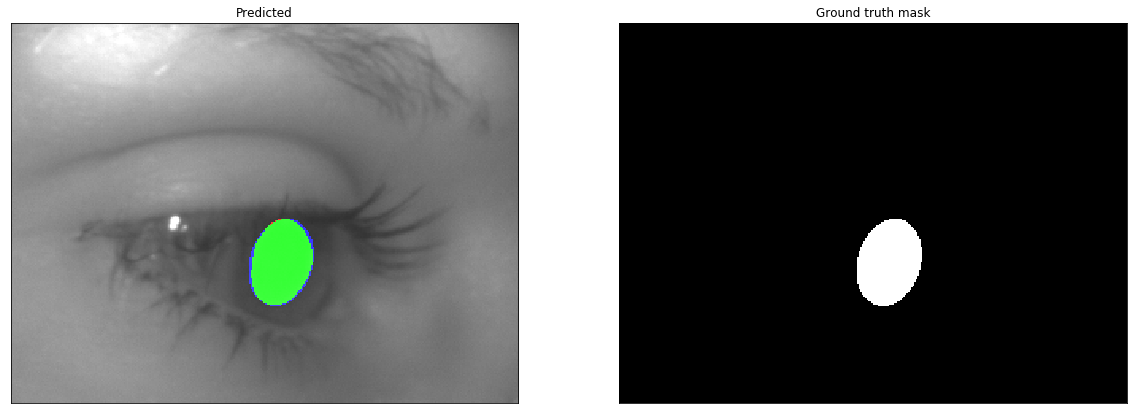

In [17]:
name = []
for filename in os.listdir("Data/test/images/input/"):
    number = filename[9:-4]
    name.append(number)

rnd = str(random.sample(name, 1))

rnd = rnd[2:-2]
    
image_name = "elps_eye_" + str(rnd) + ".png"
mask_name = "mask_eye_" + str(rnd) + ".png"

print(image_name)

image_path = 'Data/test/images/input/' + image_name
mask_path = 'Data/test/masks/output/' + mask_name

# Load the models
model = load_model('unet_weights_no_preprocessing.h5')

# Load the image
image_inp = Image.open(image_path)

mask_inp = Image.open(mask_path)
mask = np.array(mask_inp)/255.

# Scale the input between [0 1] and change the arrays (1, 240, 320, 3)
image_inp = np.array(image_inp)/255.
inp = np.expand_dims(image_inp, axis=0)

# Predict the segmanted mask given the model
y_pred = model.predict(inp, verbose=0)

# Reshape the output (240, 320)
y_pred = np.reshape(y_pred, (240, 320))

threshold = 0.7
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1

a, b, x, y, theta = getElpsParameters(y_pred)

TP = 0
FP = 0
FN = 0
TN = 0

for i in range(240):
    for j in range(320):
        # True Positive in green
        if y_pred[i][j] and mask[i][j][0]:
            image_inp[i][j][1] = 1
            TP += 1
        # False Positive in red
        if y_pred[i][j] and not mask[i][j][0]:
            image_inp[i][j][0] = 1
            FP += 1
        # False Negative in blue
        if not y_pred[i][j] and mask[i][j][0]:
            image_inp[i][j][2] = 1
            FN += 1
        if not y_pred[i][j] and not mask[i][j][0]:
            TN += 1

if TP != 0 and TN != 0: 
    prec = TP/(TP + FP)
else:
    prec = 0
rec = TP/(TP + FN)
mr = FN/(FN + TP)
acc = (TP+TN)/(TP+TN+FP+FN)  

print("Precision : {}, Recall : {}, Miss Rate : {}, Accuracy : {}".format(prec, rec, mr, acc))

print("a : {}, b : {}, x : {}, y : {}, theta : {}".format(a, b, x, y, theta))

multiPlot(1, 2, (image_inp, mask),
                 ('Predicted', 'Ground truth mask'),
                 cmap_tuple=(None, None))

## Task 2.4 :  performance assessment of the ellipse matching module

### Soccer images

First, let's focus on the classification task. The results show that, on the test set, 97% of the ellipses have been well detected and classified as ellipse. Moreover, by looking at the images where the ellipse classification was not made, Only a small part of the ellipse is visible on the image. 

The second results show that, on the test set, 99% of the detected ellipses are real ellipses. In fact, Only one detected ellipse on the test set is classified wrongly but by looking at the picture, the detected ellipse is clearly an ellipse an annotation should have been made. So, the ellipse classifications of our model are all correct on the test set.

Now, let's focus on the matching of the bounding boxes. To evaluate our model, the Intersection over Union (IoU) is used. This metric divide the area of the intersection of the bounding boxe of the annotations and the bounding boxe of the detected ellipse by the union of this 2 bounding boxes. The closer the value is to 1, the more similar the boxes. The result obtained for the mean values of the IoU between the bounding boxes of the test set is equal to 0.87, which is an excellent result, since we know that the common area of the two boxes decreases more than linearly when one box is shifted more or less diagonally (because we lose some area both in length and height).





In [ ]:
prop_detec, prop_well_class,  files_bad, mean_IOUs, list_IOU = IOU_soccer()

print("Proportion of detected ellipses: {}".format(prop_detec))
print("Proportion of real ellipses from detected ellipses {}".format(prop_well_class))
print("mean IOU: {}".format(mean_IOUs))

### Eye images

The metrics used for the classification task are the following:  
  - precision : $\frac{TP}{TP + FP}$  
  - recall : $\frac{TP}{TP + FN}$  
  - miss rate : $\frac{FN}{FN + TP}$  
  - accuracy : $\frac{TP + TN}{TP + TN + FP + FN}$  
  - IoU : $\frac{y \, \cap \, \tilde{y}}{y \, \cup \, \tilde{y}}$ 
  
where $TP, FP, TN, FN, y$ and $\tilde{y}$ represent the true positive, false positive, true negative, false negative, true output and predicted output respectively.  
  
The following tables show those value for different threshold value with and without preprocessing.  
Given the results, one can decide what threshold value use in order to maximize a metric.  

What we can analyze is that setting the threshold higher will improve the precision, decrease the recall, increase the miss rate, decrease the accuracy and the IoU.  

The miss rate metric is interesting to analyze deeper because as the threshold increase, we consider less predicted value to be true. But the ground truth being the ellipse describing the pupil but indeed a pupil is not elliptic.  
Thus we might say that the network learn to detect a pupil and not the ellipse of the pupil, which increase the value of this metric.  

The detection of pupil being more subjective than the detection of ellipse in soccer images, the results obtained are biaised on how people define a pupil.

|threshold|precision|recall|miss rate|accuracy|IoU|
|---|---|---|---|---|---|
|0.6|0.905648|**_0.9247416_**|**_0.07525836_**|0.99622035|0.8420224|
|0.7|0.92063624|0.9111186|0.08888141|**_0.9962832_**|**_0.8434102_**|
|0.8|0.9334427|0.8914266|0.10857338|0.9962517|0.84036845|
|0.9|**_0.954061_**|0.85160315|0.14839688|0.99594104|0.8218886| 

<center> Mean value over the test set </center>


|threshold|precision|recall|miss rate|accuracy|IoU|
|---|---|---|---|---|---|
|0.6|0.92058194|**0.89142174**|**0.10857833**|**0.9960184**|**0.8321461**|
|0.7|0.9339243|0.8749785|0.12502146|0.9959957|0.8290638|
|0.8|0.94087857|0.8549855|0.14501452|0.9958373|0.8198002
|0.9|**0.95338935**|0.8185414|0.18145855|0.9953745|0.79632634| 

<center> Mean value over the test set with preprocessing </center>

Concerning the eye images, based on the prediction (which is actually a binary image representing the predicted pupil), the parameters of the ellipse are computed as in TP3. They were compared with parameters computed from the groundtruth (annotations) thanks to the fitEllipse function. Based on this, the mean absolute error for each parameter can be computed for all images of the test set. Computing the mean squared error is not suitable since when there is an error, it is never under the value of 1 (since it is a number of pixels). Therefore, squa
The following results were obtained :

$MAE_{xc} = 1.37$ pixels   
$MAE_{yc} = 2.11$ pixels  
$MAE_{a} = 2.27$ pixels  
$MAE_{b} = 1.37$ pixels  
$MAE_{theta} = 2.17$ degrees  

It is important to note that these results were only computed for images where the algorithm found an ellipse where there actually was an ellipse. Concerning the angle, since it is undefined when a and b are close to each other (becaue the ellipse reduces to a circle), this value is biased.  
Concerning the preprocessing, compared to the raw images, it was noticed that it lead to better validation loss results during the learning. However, as predicted, using preprocessed images did not lead to better overall results (after evaluation of the prediction).

## References

https://pjreddie.com/darknet/yolo/  
https://arxiv.org/abs/1505.04597  
https://en.wikipedia.org/wiki/Precision_and_recall  
https://github.com/zhixuhao/unet